In [1]:
import pandas._libs.testing as _testing
import numpy as np
import pandas as pd
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import matplotlib.pyplot as plt
from datetime import datetime
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import RESTClient
from polygon import RESTClient
from polygon.rest.models.request import RequestOptionBuilder

In [3]:
# create client
client = RESTClient(api_key="HsOX1rl8t3B1AJfl4O2uqscUp372l7EF")

In [28]:
ticker = "AAPL"

# List Aggregates (Bars)
aggs = []
for a in client.list_aggs(ticker=ticker, multiplier=1, timespan="day", from_="2021-01-01", to="2024-01-07", limit=50000):
    aggs.append(a)

In [29]:
df = pd.DataFrame(aggs)
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df

,open,high,low,close,volume,vwap,timestamp,transactions,otc,date
0,168.91,171.5300,165.910,166.42,87227768.0,168.8014,1650513600000,752017,None,2022-04-21 04:00:00
1,166.46,167.8699,161.500,161.79,84875424.0,164.2289,1650600000000,730001,None,2022-04-22 04:00:00
2,161.12,163.1700,158.460,162.88,96017376.0,160.7032,1650859200000,925124,None,2022-04-25 04:00:00
3,162.25,162.3400,156.720,156.80,95595226.0,158.6074,1650945600000,899965,None,2022-04-26 04:00:00
4,155.91,159.7900,155.380,156.57,88063191.0,157.4448,1651032000000,777860,None,2022-04-27 04:00:00
...,...,...,...,...,...,...,...,...,...,...
425,193.90,194.4000,191.725,192.53,42672148.0,192.5761,1703826000000,509123,None,2023-12-29 05:00:00
426,187.15,188.4400,183.885,185.64,81964874.0,185.9465,1704171600000,1008871,None,2024-01-02 05:00:00
427,184.22,185.8800,183.430,184.25,58414460.0,184.3226,1704258000000,656853,None,2024-01-03 05:00:00
428,182.15,183.0872,180.880,181.91,71878670.0,182.0183,1704344400000,712692,None,2024-01-04 05:00:00


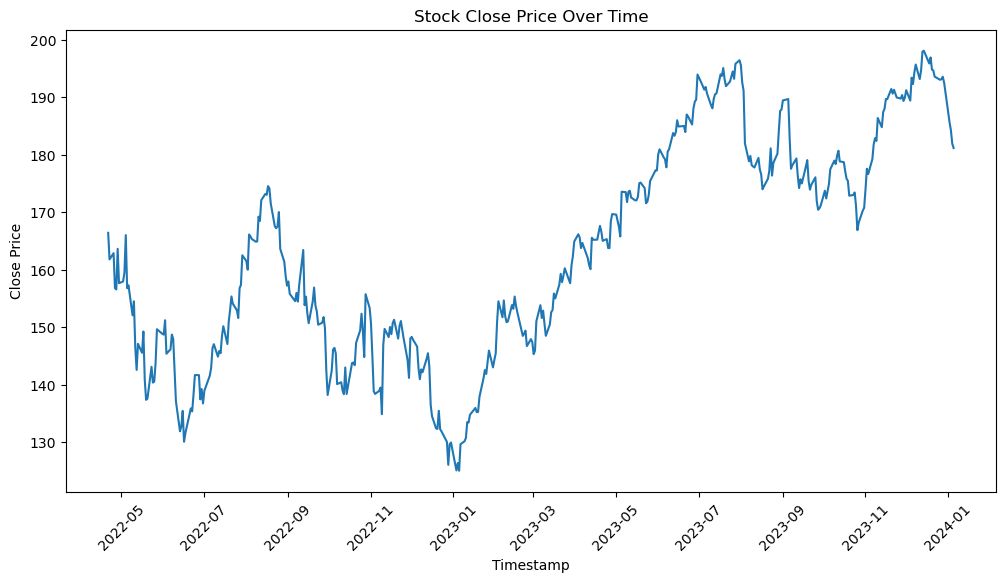

In [30]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['close'], label='Close Price')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Stock Close Price Over Time')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [32]:
contractNames = []
for c in client.list_options_contracts(underlying_ticker = 'AAPL', limit = 1000):
    contractNames.append(c)
cn = pd.DataFrame(contractNames)
cn

,additional_underlyings,cfi,contract_type,correction,exercise_style,expiration_date,primary_exchange,shares_per_contract,strike_price,ticker,underlying_ticker
0,None,OCASPS,call,None,american,2024-04-26,BATO,100,100.0,O:AAPL240426C00100000,AAPL
1,None,OCASPS,call,None,american,2024-04-26,BATO,100,105.0,O:AAPL240426C00105000,AAPL
2,None,OCASPS,call,None,american,2024-04-26,BATO,100,110.0,O:AAPL240426C00110000,AAPL
3,None,OCASPS,call,None,american,2024-04-26,BATO,100,115.0,O:AAPL240426C00115000,AAPL
4,None,OCASPS,call,None,american,2024-04-26,BATO,100,120.0,O:AAPL240426C00120000,AAPL
...,...,...,...,...,...,...,...,...,...,...,...
2149,None,OPASPS,put,None,american,2026-12-18,BATO,100,310.0,O:AAPL261218P00310000,AAPL
2150,None,OPASPS,put,None,american,2026-12-18,BATO,100,320.0,O:AAPL261218P00320000,AAPL
2151,None,OPASPS,put,None,american,2026-12-18,BATO,100,330.0,O:AAPL261218P00330000,AAPL
2152,None,OPASPS,put,None,american,2026-12-18,BATO,100,340.0,O:AAPL261218P00340000,AAPL


""


In [38]:
#polygon data structure
type(contractNames[1398])
contractNames[1398]

OptionsContract(additional_underlyings=None, cfi='OCASPS', contract_type='call', correction=None, exercise_style='american', expiration_date='2025-01-17', primary_exchange='BATO', shares_per_contract=100, strike_price=285, ticker='O:AAPL250117C00285000', underlying_ticker='AAPL')

In [39]:
#to view individual contract general data
contractData = contractNames[1398]
optionsTicker = contractData.ticker
optionsTicker

'O:AAPL250117C00285000'

In [40]:
from datetime import datetime, timedelta
import time

# Convert date strings to Unix timestamps
from_date = int((datetime.strptime('2022-03-01', '%Y-%m-%d') - datetime(1970, 1, 1)).total_seconds()) * 1000
to_date = int((datetime.strptime('2024-01-01', '%Y-%m-%d') - datetime(1970, 1, 1)).total_seconds()) * 1000

# Daily options price bars
dailyOptionData = client.get_aggs(ticker=optionsTicker,
                                  multiplier=1,
                                  timespan='day',
                                  from_=from_date,
                                  to=to_date)

In [41]:
dailyOptionData = pd.DataFrame(dailyOptionData)
dailyOptionData['date_option'] = pd.to_datetime(dailyOptionData['timestamp'], unit='ms')
dailyOptionData

,open,high,low,close,volume,vwap,timestamp,transactions,otc,date_option
0,3.30,3.30,3.30,3.30,50,3.3000,1666324800000,1,None,2022-10-21 04:00:00
1,3.86,3.86,3.86,3.86,10,3.8600,1666670400000,1,None,2022-10-25 04:00:00
2,4.55,4.95,4.55,4.60,8,4.6563,1666929600000,4,None,2022-10-28 04:00:00
3,4.25,4.25,4.21,4.21,2,4.2300,1667188800000,2,None,2022-10-31 04:00:00
4,3.81,3.81,3.81,3.81,1,3.8100,1667275200000,1,None,2022-11-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...
162,1.05,1.05,0.91,0.94,84,1.0454,1703134800000,6,None,2023-12-21 05:00:00
163,0.91,0.91,0.91,0.91,21,0.9100,1703221200000,5,None,2023-12-22 05:00:00
164,0.83,0.83,0.83,0.83,4,0.8300,1703566800000,1,None,2023-12-26 05:00:00
165,0.79,0.79,0.79,0.79,13,0.7900,1703653200000,4,None,2023-12-27 05:00:00


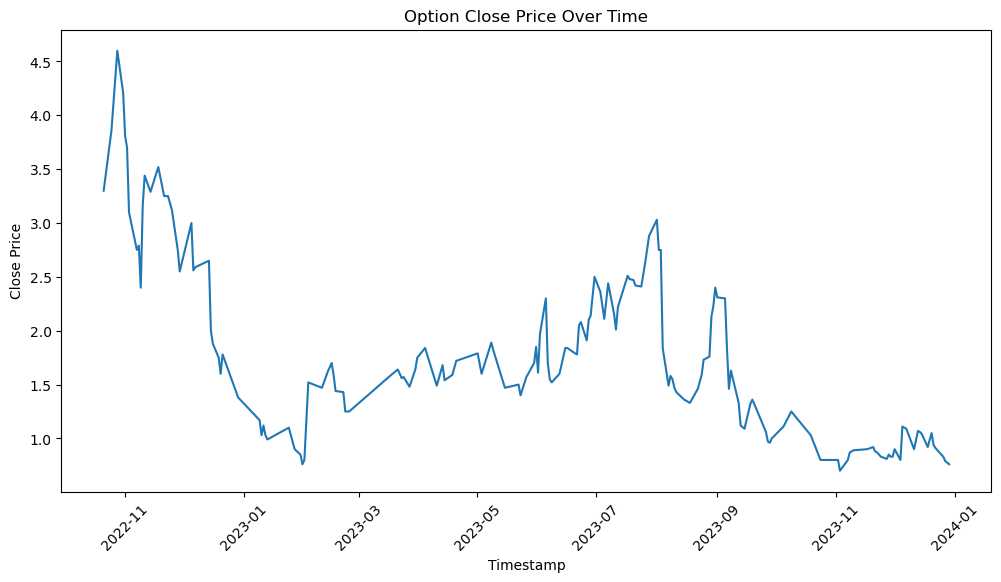

In [42]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(dailyOptionData['date_option'], dailyOptionData['close'], label='Close Price')

# Adding labels and title
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.title('Option Close Price Over Time')

# Rotating x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [43]:
from scipy.optimize import newton
from math import log, sqrt, exp
from scipy.stats import norm

In [44]:
def black_scholes_call(S, X, T, r, sigma):
    d1 = (log(S / X) + (r + 0.5 * sigma**2) * T) / (sigma * sqrt(T))
    return S * norm.cdf(d1) - X * exp(-r * T) * norm.cdf(d1 - sigma * sqrt(T))

def implied_volatility(option_price, S, X, T, r, initial_guess=0.2):
    # Define a function that represents the difference between market price and Black-Scholes price
    option_price_difference = lambda sigma: black_scholes_call(S, X, T, r, sigma) - option_price
    # Use numerical optimization to find the implied volatility
    implied_volatility = newton(option_price_difference, initial_guess)
    return implied_volatility

In [45]:
# Example usage AAPL a fecha 9 enero 2024

market_price = 5.6510  # Replace with the actual market price of the option
spot_price = 185.56  # Replace with the current spot price of the underlying asset
strike_price = 200.0  # Replace with the strike price of the option
time_to_expiry = 0.4493  # Replace with the time to expiration in years
risk_free_rate = 0.038 # Replace with the risk-free interest rate

iv = implied_volatility(market_price, spot_price, strike_price, time_to_expiry, risk_free_rate)
print(f"Implied Volatility: {iv}")

Implied Volatility: 0.20066664578028
